In [167]:
#Podaci o nekom modelu polovnog automobila [starost, NajvisaCena] [starost, NajnizaCena]
#podaci o modelu Renault Clio IV (2012-2020)
podaci = [
    [11,8000],[11,4999], #godina 2012 izuzeta zbog toga sto se model Clio III proizvodio te godine
    [10,7700],[10,4899],
    [9,8500],[9,5200],
    [8,8750],[8,4999],
    [7,9299],[7,6500],
    [6,10799],[6,3800],
    [5,11200],[5,6990],
    [4,10500],[4,6890]
]

In [169]:
import matplotlib.pyplot as plt
import pandas as pd

In [171]:
#Definisanje skupova podataka
ulazniPodaci = pd.DataFrame(podaci, columns = ["Starost","ProdajnaCena"])

#pravljenje vektora x
x = ulazniPodaci["Starost"]
#pravljenje vektora y
y = ulazniPodaci["ProdajnaCena"]

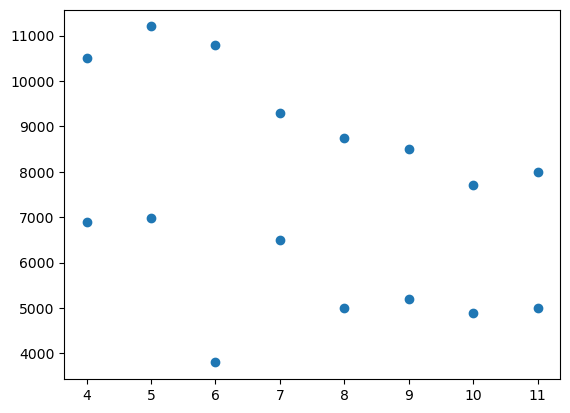

In [173]:
plt.scatter(x,y)
plt.show()

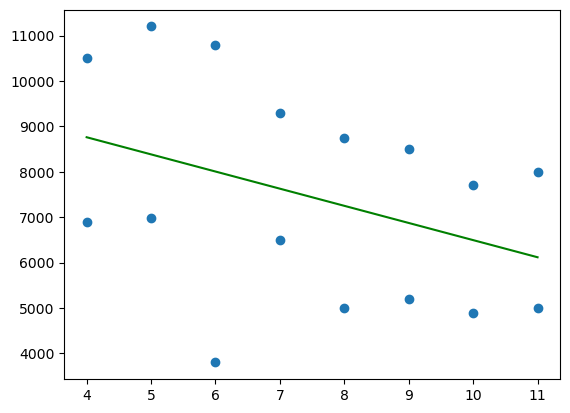

In [174]:
#linearna regresija primena
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x, y)

def funkcija_lr(x):
    #pravljenje funkcije linearne regresije
    return slope * x + intercept

#izvrsavanje funkcije sa vrednostima sa x-ose
model_lr = list(map(funkcija_lr,x))

#graficki prikaz
plt.scatter(x,y) #originalni podaci
plt.plot(x, model_lr, color="g") #linija linearne regresije
plt.show()

In [177]:
#odredjivanje koeficijenta korelacije
print(r)

-0.3881768634754788


In [179]:
#parametri linearne funkcije
print(f"Nagib funkcije je:{slope}")
godisnjiPadCene = abs(slope)
print(f"Modelu Renault Clio IV koji se proizvodio od 2012. godine do 2020. godine, godisnje pada cena: {round(godisnjiPadCene,2)}€")
print(f"Funkcija preseca y-osu u tacki: {intercept}")

Nagib funkcije je:-377.61309523809524
Modelu Renault Clio IV koji se proizvodio od 2012. godine do 2020. godine, godisnje pada cena: 377.61€
Funkcija preseca y-osu u tacki: 10271.160714285714


In [181]:
#predvidjanje cene na osnovu starosti automobila
starost = input("Unesite starost automobila Renault Clio IV kako bi dobili cenu za tu starost: ")
starost = int(starost)
if not (starost > 11 or starost < 4):
    godina = funkcija_lr(starost)
    print(f"Renault Clio IV koji je star {starost} godina, može imati cenu od: {round(godina)}€")
else:
    print("Model Renault Clio IV se proizvodio od 2012 do 2020. Unesite vazecu vrednost.")



Unesite starost automobila Renault Clio IV kako bi dobili cenu za tu starost:  5


Renault Clio IV koji je star 5 godina, može imati cenu od: 8383€


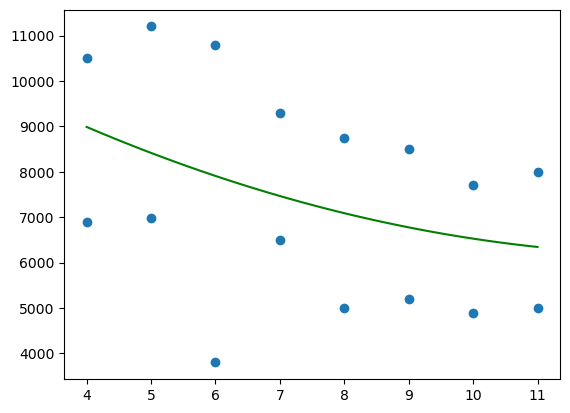

In [183]:
#polinomska regresija
import numpy

#polinom drugog reda
model_pr = numpy.poly1d(numpy.polyfit(x,y,2))

#interval [4,11]
linija_pr = numpy.linspace(4,11,100)

plt.scatter(x,y)
plt.plot(linija_pr,model_pr(linija_pr), color="g")
plt.show()

In [123]:
#prikaz polinomske funkcije
print(str(model_pr))

      2
40.1 x - 901.8 x + 1.19e+04


In [185]:
#kvadrat koeficijenta korelacije
from sklearn.metrics import r2_score
print(r2_score(y,model_pr(x)))

0.15510925241026985


In [197]:
#predvidjanje za:
godina = input("Za koliko godina zelite da predvidite cenu automobila Renault Clio IV? : " )
godina = int(godina)
cena = model_pr(godina)
print(f"Cena modela Renault Clio IV za {godina} godina/e ce se kretati oko {round(cena)}€")

Za koliko godina zelite da predvidite cenu automobila Renault Clio IV? :  150


Cena modela Renault Clio IV za 150 godina/e ce se kretati oko 610693€
